In [ ]:
import os

from fastai.vision.all import *
from fastai.vision import *

import pandas as pd
from src.classification.utils import available_models, get_dataloaders
from src.classification.train_model_utils import train_model_across_dataloaders

### Blurry Classification for all classes together

### Prepare datasets

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the paths for the good quality and blurry image datasets
good_quality_path = '/home/etaylor/code_projects/thesis/segments/etaylor_cannabis_patches_train_26-04-2024_15-44-44/ground_truth_trichomes_datasets/trichome_dataset_125_good_quality'
blurry_path = '/home/etaylor/code_projects/thesis/segments/etaylor_cannabis_patches_train_26-04-2024_15-44-44/ground_truth_trichomes_datasets/trichome_dataset_125_blurry'

# Define the paths for the output classification datasets
output_path = '/home/etaylor/code_projects/thesis/segments/etaylor_cannabis_patches_train_26-04-2024_15-44-44/ground_truth_trichomes_datasets/blurry_classification_datasets/all_classes'

# Classes in the dataset
classes = ['clear', 'cloudy', 'amber']

# Function to collect and split images from multiple classes
def collect_and_split_images(source_base_path, output_base_path):
    all_images = []

    for cls in classes:
        class_path = os.path.join(source_base_path, cls)
        files = [os.path.join(class_path, file) for file in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, file))]
        all_images.extend(files)

    # Split the combined images into train and test sets
    train_files, test_files = train_test_split(all_images, test_size=0.2, random_state=42)

    # Create output directories for train and test
    train_good_output_path = os.path.join(output_base_path, 'train', 'good_quality')
    test_good_output_path = os.path.join(output_base_path, 'test', 'good_quality')
    train_blurry_output_path = os.path.join(output_base_path, 'train', 'blurry')
    test_blurry_output_path = os.path.join(output_base_path, 'test', 'blurry')

    os.makedirs(train_good_output_path, exist_ok=True)
    os.makedirs(test_good_output_path, exist_ok=True)
    os.makedirs(train_blurry_output_path, exist_ok=True)
    os.makedirs(test_blurry_output_path, exist_ok=True)

    return train_files, test_files, train_good_output_path, test_good_output_path, train_blurry_output_path, test_blurry_output_path

# Collect and split images for both good quality and blurry datasets
train_good, test_good, train_good_output, test_good_output, _, _ = collect_and_split_images(good_quality_path, output_path)
train_blurry, test_blurry, _, _, train_blurry_output, test_blurry_output = collect_and_split_images(blurry_path, output_path)

# Copy the files to the respective directories
for file in train_good:
    shutil.copy(file, os.path.join(train_good_output, os.path.basename(file)))
for file in test_good:
    shutil.copy(file, os.path.join(test_good_output, os.path.basename(file)))
for file in train_blurry:
    shutil.copy(file, os.path.join(train_blurry_output, os.path.basename(file)))
for file in test_blurry:
    shutil.copy(file, os.path.join(test_blurry_output, os.path.basename(file)))

print(f"Images have been organized and split into train and test sets at {output_path}")


Images have been organized and split into train and test sets at /home/etaylor/code_projects/thesis/segments/etaylor_cannabis_patches_train_26-04-2024_15-44-44/ground_truth_trichomes_datasets/blurry_classification_datasets/all_classes


In [ ]:
from src.classification.create_balanced_datasets import print_image_distribution
# check the class distribution for each of the classes in the dataset
all_classes_path = "/home/etaylor/code_projects/thesis/segments/etaylor_cannabis_patches_train_26-04-2024_15-44-44/ground_truth_trichomes_datasets/blurry_classification_datasets/all_classes"
train_path = os.path.join(all_classes_path, 'train')
test_path = os.path.join(all_classes_path, 'test')

print_image_distribution(train_path)
print_image_distribution(test_path)


--- Image Distribution in '/home/etaylor/code_projects/thesis/segments/etaylor_cannabis_patches_train_26-04-2024_15-44-44/ground_truth_trichomes_datasets/blurry_classification_datasets/all_classes/train' ---
Class 'good_quality': 1106 images
Class 'blurry': 596 images

--- Image Distribution in '/home/etaylor/code_projects/thesis/segments/etaylor_cannabis_patches_train_26-04-2024_15-44-44/ground_truth_trichomes_datasets/blurry_classification_datasets/all_classes/test' ---
Class 'good_quality': 277 images
Class 'blurry': 149 images



In [ ]:
all_classes_dataloader_dict = get_dataloaders(output_path)

Training with configuration: combined_all


epoch,train_loss,valid_loss,error_rate,precision_score,recall_score,time
0,0.799964,0.548200,0.233083,0.746194,0.761650,00:06


epoch,train_loss,valid_loss,error_rate,precision_score,recall_score,time
0,0.618961,0.422210,0.174812,0.805782,0.817716,00:04
1,0.552297,0.392368,0.163534,0.820319,0.816092,00:02
2,0.509702,0.345190,0.144737,0.841368,0.836863,00:03
3,0.500317,0.352622,0.142857,0.843182,0.839580,00:03
4,0.463080,0.358662,0.167293,0.816109,0.811938,00:03
5,0.401587,0.375700,0.150376,0.831884,0.850481,00:03
6,0.401214,0.362377,0.142857,0.862758,0.816529,00:03
7,0.378327,0.374802,0.172932,0.810920,0.835801,00:03
8,0.362650,0.353935,0.146617,0.835695,0.850793,00:03
9,0.339964,0.372326,0.172932,0.808282,0.825556,00:03


Results for combined_all: [0.31415534019470215, 0.1428571492433548, 0.840976460331299, 0.8664730134932533]


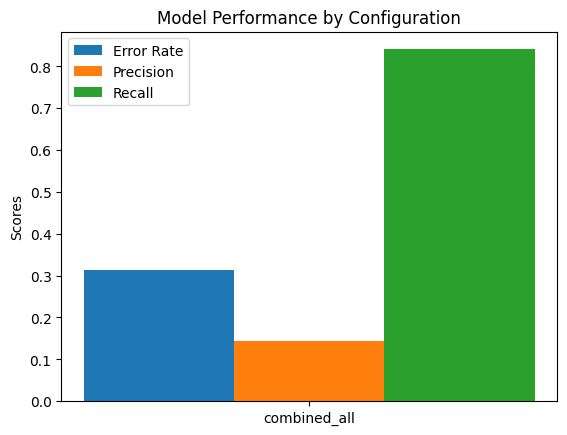

In [ ]:
results, models = train_model_across_dataloaders(all_classes_dataloader_dict, 'alexnet')